# Loan Default Prediction and Visualization

## Project Overview
This project aims to predict loan defaults using a machine learning model and visualize the predicted dataset using Power BI. The goal is to identify key factors contributing to loan defaults and create an efficient ML model to make prediction on production dataset then use Power BI on predicted dataset to provide actionable insights through interactive dashboards.

## Objectives
1. Run Models: Import the "Raw_Data_Singapore Credit Dataset" and run multiple supervised ML models with 3 different train-test split ratios (70/30, 75/25, 80/20).

2. Select Best Model: Perform a comparative analysis of the models based on evaluation metrics to select the best model. Fit the final model on the test dataset and save it for future use.

3. Predict New Data: Use the selected model to predict outcomes for the "Predict_Data_Singapore Credit Dataset" (production data) and generate the target labels.

4. Visualize in Power BI: Import the predicted dataset into Power BI and create visualizations for client reporting.


# About the dataset:
## This dataset contains information about the credit landscape (credit loan provided to customers) of a large Singapore bank. 
# The Goal: 
## Predict whether the customer will default or not in the credit payment (credit loan payment).

# where default is the target variable


# Data Collection

In [4]:
# Importing Necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



# Loading data

In [5]:
df=pd.read_csv('D:\DATA\intern\Raw_Data_Singapore Credit Dataset.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Initial Data Exploration


In [3]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 SGD,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 SGD,36,good,car,6948,< 100 SGD,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 SGD,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 SGD,30,critical,car,5234,< 100 SGD,unemployed,4,2,28,none,own,2,management,1,no,yes


In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

(1000, 17)

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

In [7]:
df.isnull().sum().sum()

0

In [8]:
cat_var=df.select_dtypes(include='object')
print(cat_var.columns)

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default'],
      dtype='object')


In [ ]:
df['default'].value_counts()

In [ ]:
df['checking_balance'].value_counts()

In [ ]:
df['credit_history'].value_counts()

In [ ]:
df['savings_balance'].value_counts()

In [ ]:
df['dependents'].value_counts()

In [ ]:
df['credit_history'].value_counts()

In [ ]:
df['purpose'].value_counts()

In [ ]:
df['savings_balance'].value_counts()

In [ ]:
df['percent_of_income'].value_counts()

In [ ]:
df['employment_duration'].value_counts()

In [9]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


# Data Cleaning

In [10]:
dups=df.duplicated()
print(dups.any())
print(df[dups])

False
Empty DataFrame
Columns: [checking_balance, months_loan_duration, credit_history, purpose, amount, savings_balance, employment_duration, percent_of_income, years_at_residence, age, other_credit, housing, existing_loans_count, job, dependents, phone, default]
Index: []


In [11]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

### Removing unwanted characters from columns and Converting  to appropriate data types.


In [12]:
df['savings_balance'] = df['savings_balance'].str.replace(' SGD', '')
df['checking_balance'] = df['checking_balance'].str.replace(' SGD', '')
df['employment_duration'] = df['employment_duration'].str.replace(' years', '')


In [13]:
cat_var=df.select_dtypes(include='object')

print(cat_var.columns)

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default'],
      dtype='object')


In [14]:
num_var=df.select_dtypes(include='int64')
print(num_var.columns)

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents'],
      dtype='object')


# Exploratory Data Analysis (EDA) and Data Visualisation


## Univariate Analysis

### Num Vars

In [15]:
num_var=['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents']

Text(0.5, 0, 'months_loan_duration')

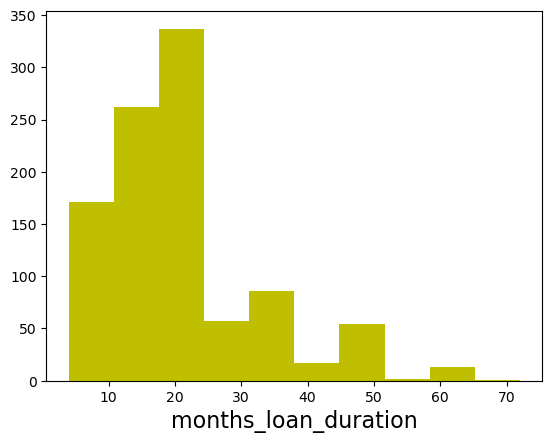

In [16]:
plt.hist(df['months_loan_duration'],color='y',label='months_loan_duration')
plt.xlabel('months_loan_duration',fontsize=16)


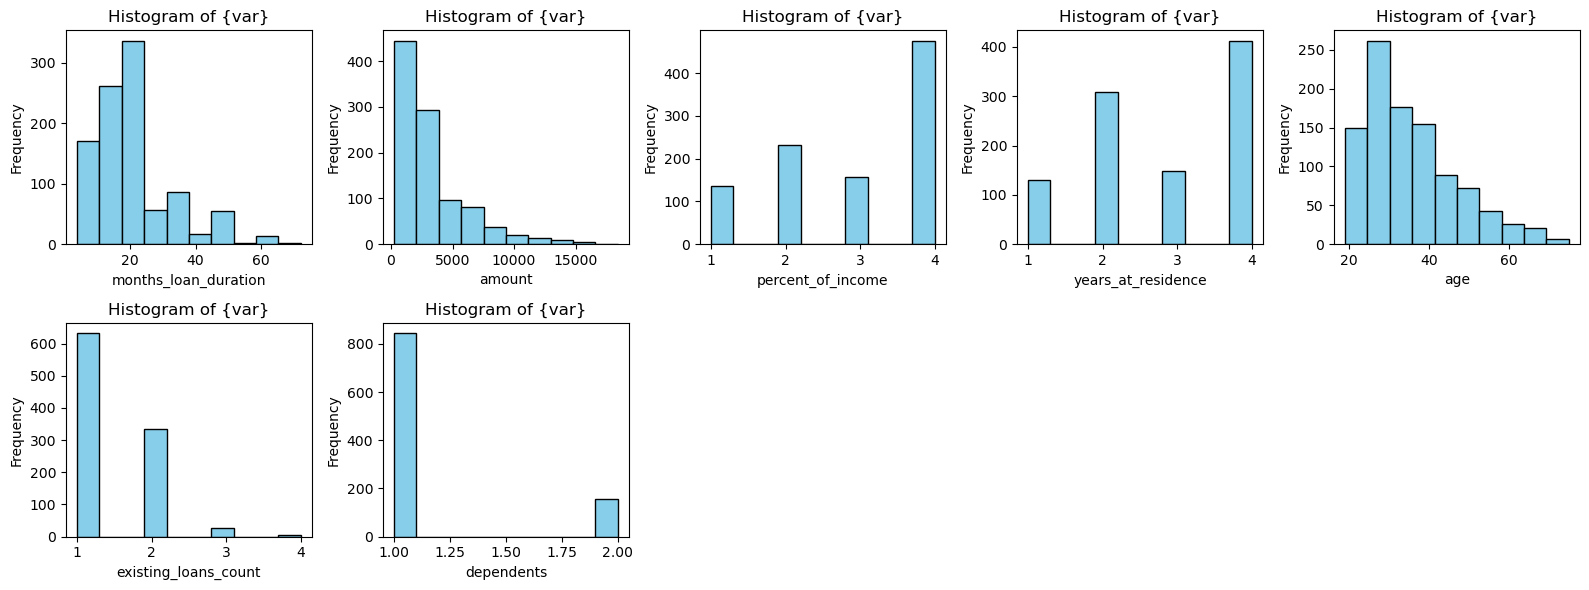

In [17]:
plt.figure(figsize=(16,6))

for i, var in enumerate(num_var, start=1):
    plt.subplot(2, 5, i)
    plt.hist(df[var], bins=10, color='skyblue', edgecolor='black')

    plt.title('Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



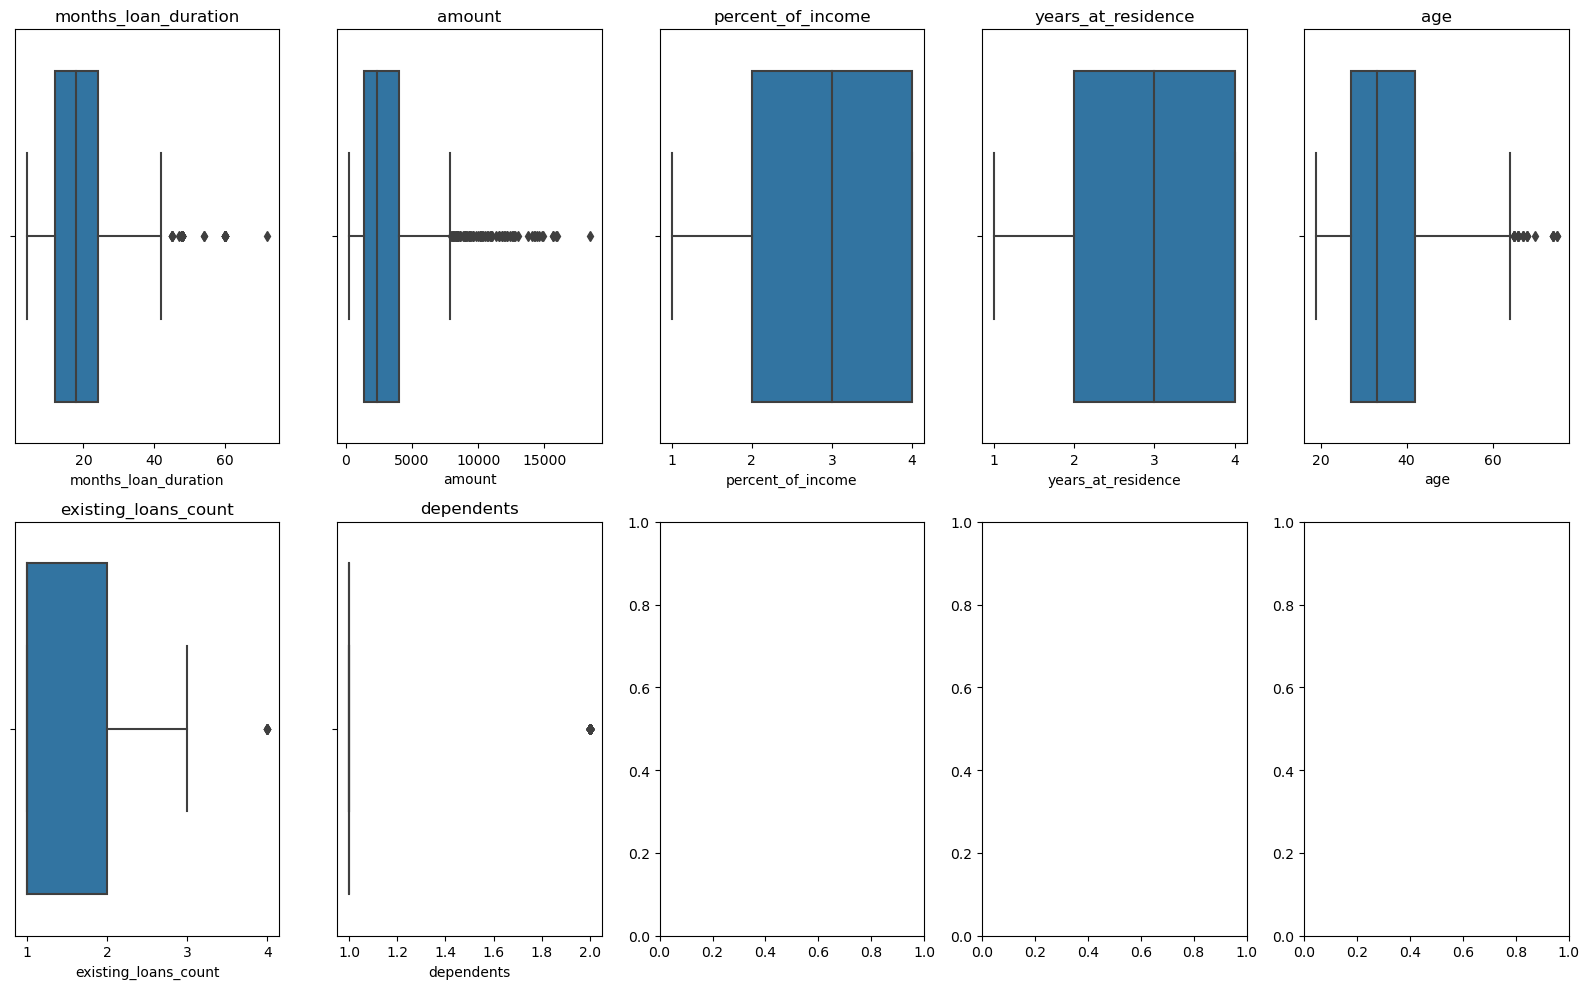

In [18]:

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)  
for i, var in enumerate(num_var):
    row = i // 5  
    col = i % 5   
    
    sns.boxplot(x=df[var], ax=axes[row, col])
    axes[row, col].set_title(var)  

plt.tight_layout()  
plt.show()


In [ ]:

fig, axes = plt.subplots(nrows=len(num_var), ncols=1, figsize=(10,10))


for i, var in enumerate(num_var):
    sns.violinplot(x=df[var], ax=axes[i], color='skyblue', inner='quartile')
    axes[i].set_xlabel(var, fontsize=14)
    axes[i].set_ylabel('Value', fontsize=14)
    axes[i].set_title(f'Violin Plot of {var}', fontsize=16)

plt.tight_layout()
plt.show()

In [20]:
num_var

['months_loan_duration',
 'amount',
 'percent_of_income',
 'years_at_residence',
 'age',
 'existing_loans_count',
 'dependents']

In [21]:

    Q1 = df['months_loan_duration'].quantile(0.25)
    Q3 = df['months_loan_duration'].quantile(0.75)
    IQR = Q3 - Q1

outliers = (df['months_loan_duration'] < (Q1 - 1.5 * IQR)) | (df['months_loan_duration'] > (Q3 + 1.5 * IQR))
df_no_outliers = df[~outliers]
print(outliers.value_counts())

False    930
True      70
Name: months_loan_duration, dtype: int64


In [22]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['amount'] < (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR))
df_no_outliers = df[~outliers]
print(outliers.value_counts())

False    928
True      72
Name: amount, dtype: int64


In [23]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))
df_no_outliers = df[~outliers]
print(outliers.value_counts())

False    977
True      23
Name: age, dtype: int64


## Outliers are present but  we need not to remove them it will affect the quality of dataset

# Cat vars

In [24]:
cat_vars=['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default']

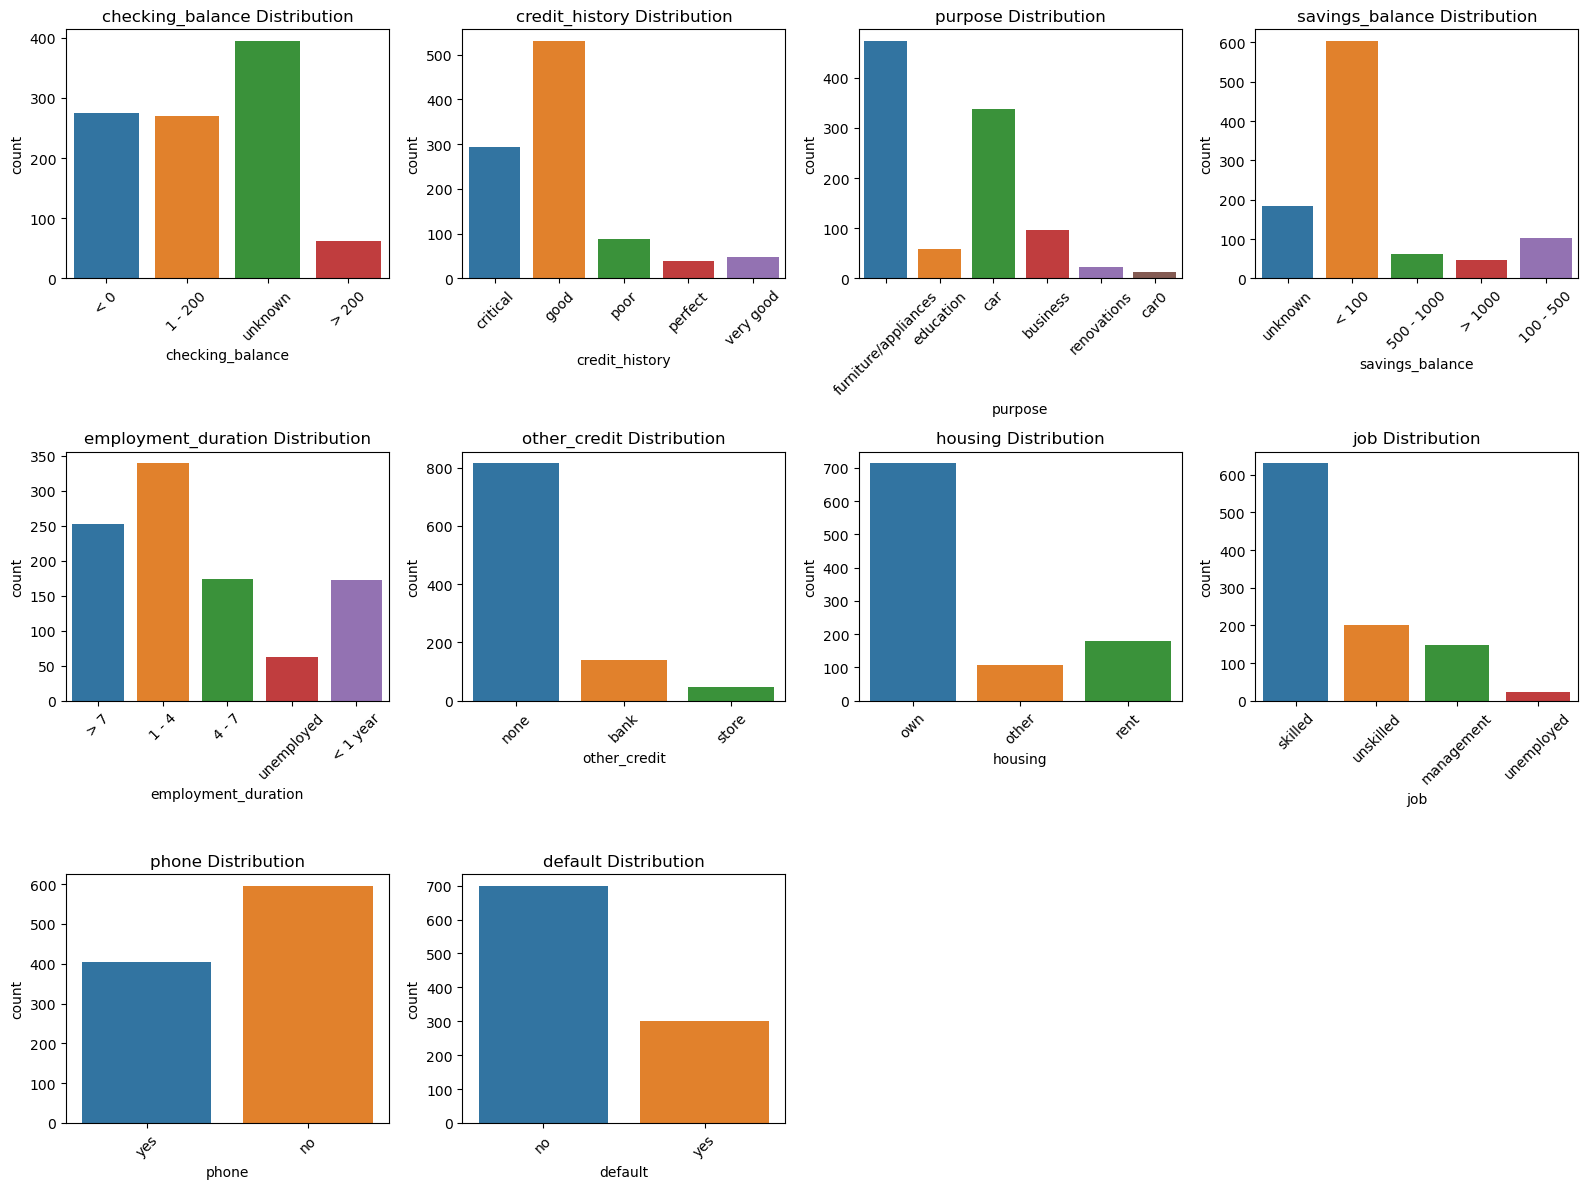

In [23]:

plt.figure(figsize=(16, 12))

for i, var in enumerate(cat_vars):
    plt.subplot(3, 4, i + 1)
    sns.countplot(data=df, x=var)
    plt.title(f'{var} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [ ]:
for var in cat_vars:
    freq_table = pd.crosstab(index=df[var], columns="count")
    print(f"Frequency Table for {var}:\n{freq_table}\n")


In [26]:
for var in cat_vars:
    mode = df[var].mode().values[0]
    print(f"Mode for {var}: {mode}")


Mode for checking_balance: unknown
Mode for credit_history: good
Mode for purpose: furniture/appliances
Mode for savings_balance: < 100
Mode for employment_duration: 1 - 4
Mode for other_credit: none
Mode for housing: own
Mode for job: skilled
Mode for phone: no
Mode for default: no


In [ ]:
for var in cat_vars:
    plt.figure(figsize=(6, 2))
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{var} Distribution')
    plt.ylabel('')
    plt.show()


# Bivariate analysis


In [28]:
num_var

['months_loan_duration',
 'amount',
 'percent_of_income',
 'years_at_residence',
 'age',
 'existing_loans_count',
 'dependents']

<Figure size 2500x2500 with 0 Axes>

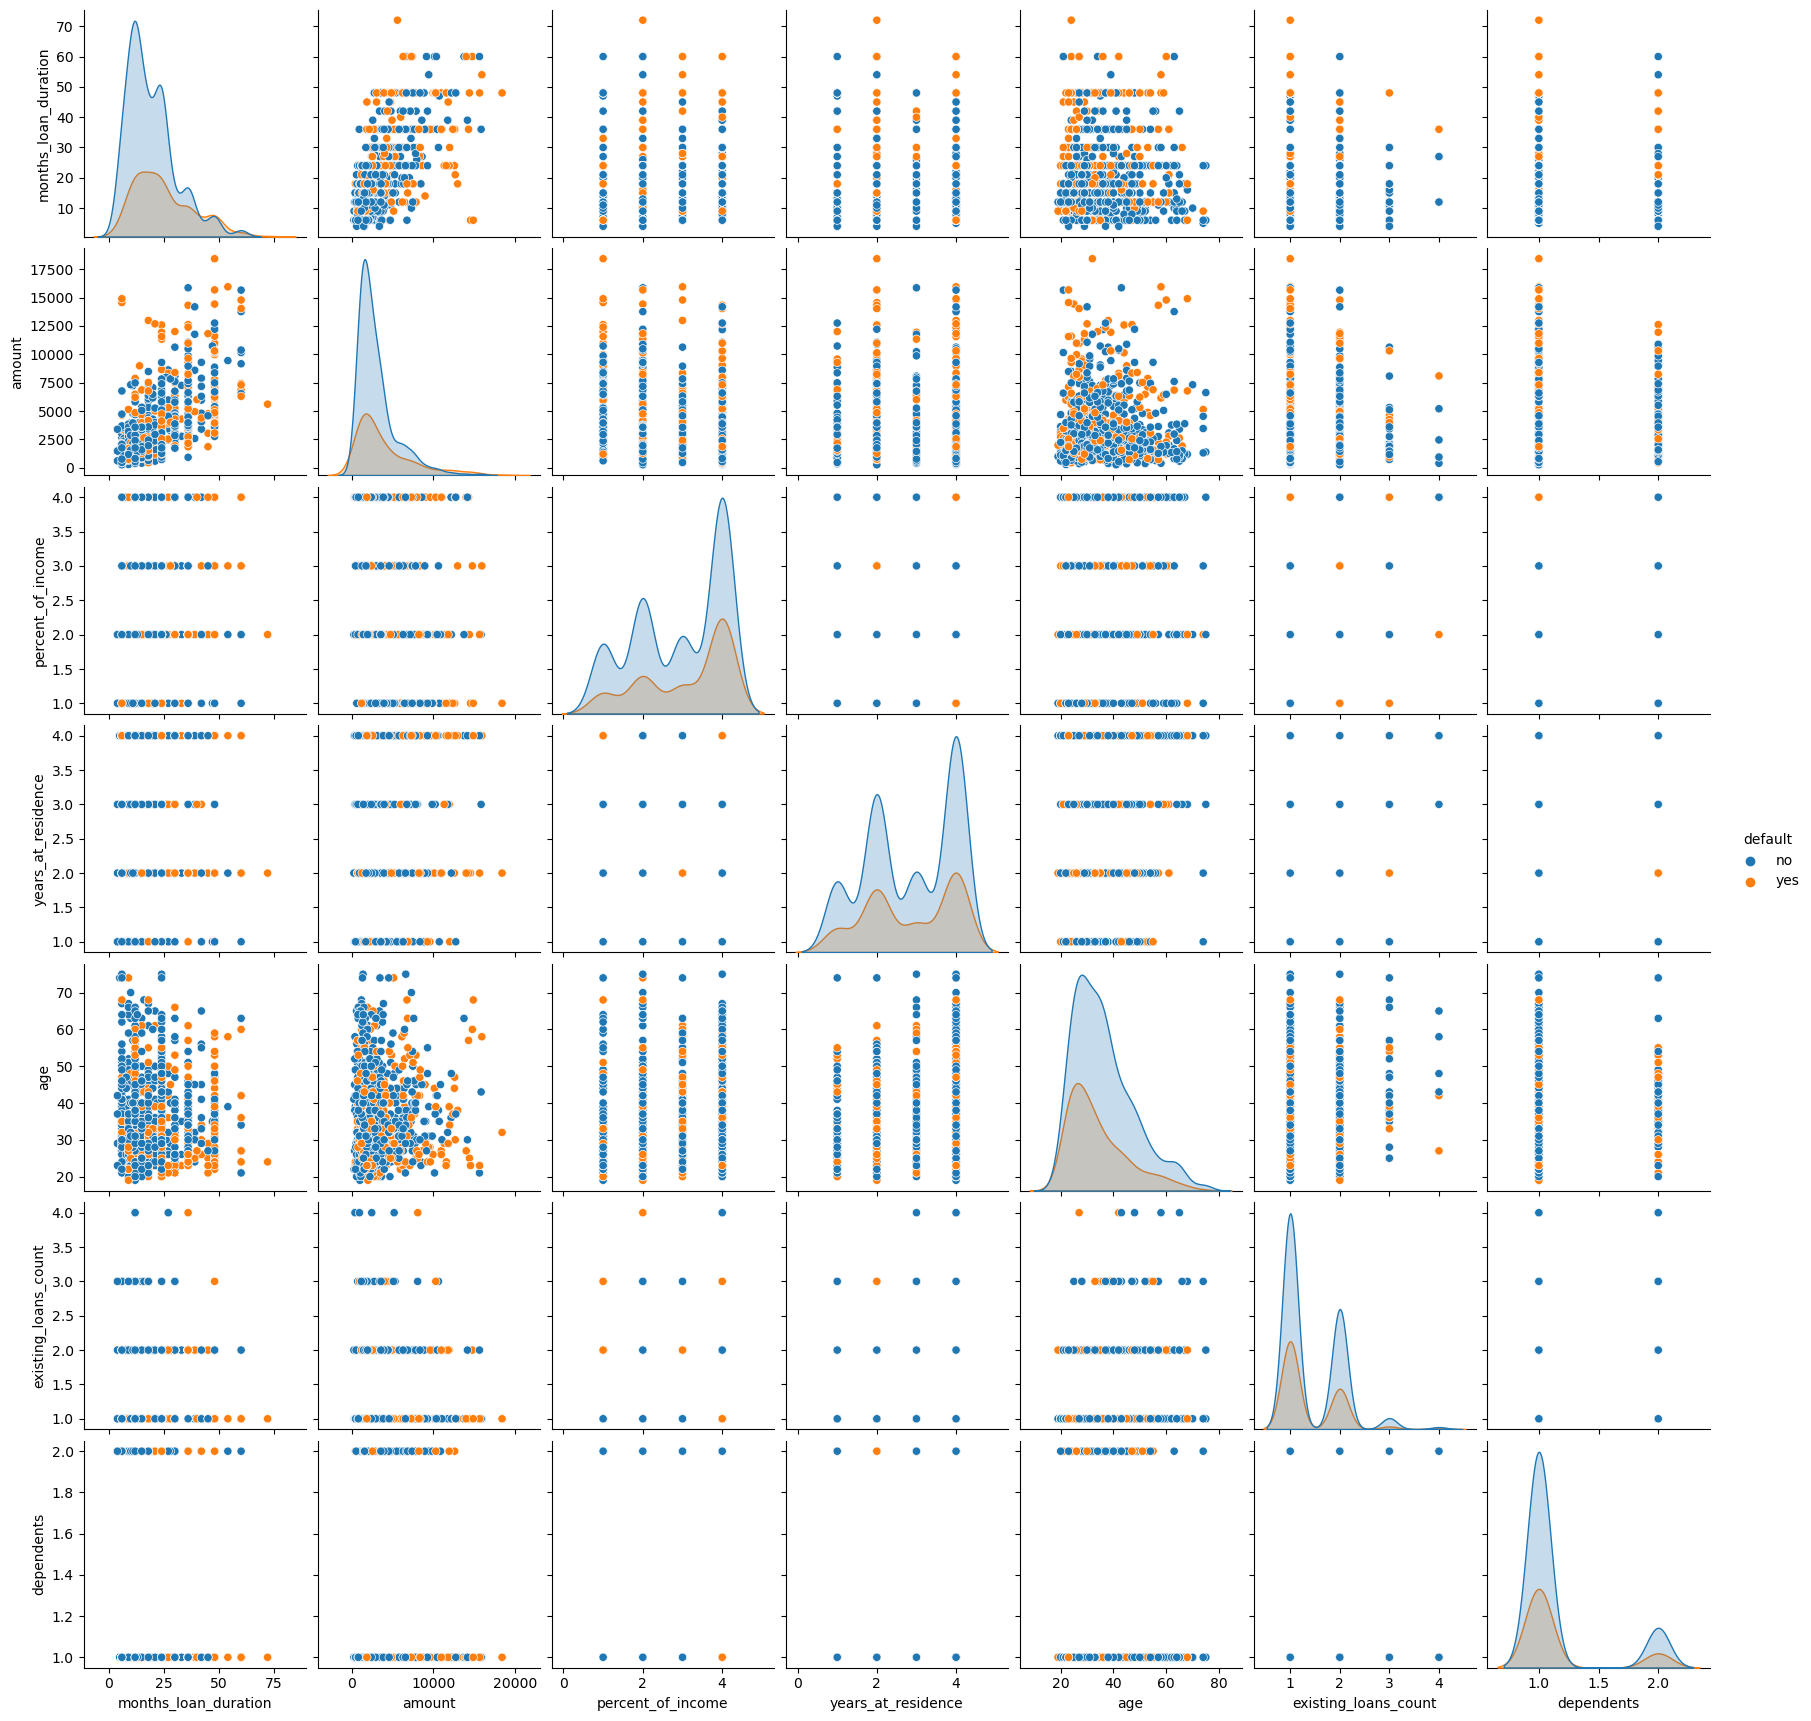

In [29]:
plt.figure(figsize=(25,25))
sns.pairplot(df,hue='default')

## For Correlation Analysis

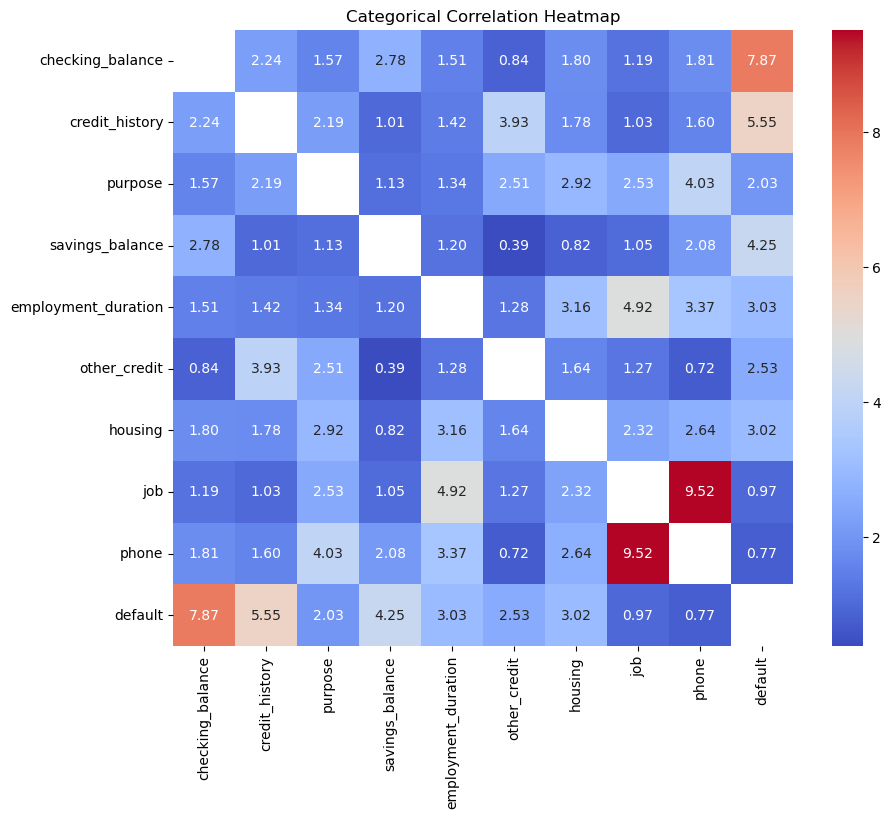

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

to_corr = ['checking_balance', 'credit_history', 'purpose', 'savings_balance',
                    'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
df_selected = df[to_corr]

corr_matrix = pd.DataFrame(index=to_corr, columns=to_corr)
for col1 in to_corr:
    for col2 in to_corr:
        if col1 != col2:
            cross_tab = pd.crosstab(df_selected[col1], df_selected[col2])
            chi2, _, _, _ = chi2_contingency(cross_tab)
            n = min(cross_tab.shape)
            corr_matrix.loc[col1, col2] = np.sqrt(chi2 / (n * (n - 1)))
corr_matrix = corr_matrix.astype(float)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Correlation Heatmap')
plt.show()


### Here in the correlation matrix we can clearly see the corrrelation of the categorical variables with each other but the thing to notice here is that the     'job', 'phone'    are least correlated to target var  and highily correlated to each other and moderately correlated to    'employment_duration'   so we will delete 2 of them

## Droping unnessery features

In [31]:
columns_to_drop = ['job', 'phone']
df = df.drop(columns=columns_to_drop)


In [ ]:
df=df.drop('default_binary',axis=1)


#  Data Preprocessing

## Encoding categorical data

In [33]:
from sklearn.preprocessing import OneHotEncoder


In [34]:
dummy_df=pd.get_dummies(df[['checking_balance', 'savings_balance', 'purpose', 'other_credit','housing','default']] ,drop_first='True')

In [35]:
dummy_df.shape

(1000, 17)

In [36]:
dummy_df.keys()

Index(['checking_balance_< 0', 'checking_balance_> 200',
       'checking_balance_unknown', 'savings_balance_500 - 1000',
       'savings_balance_< 100', 'savings_balance_> 1000',
       'savings_balance_unknown', 'purpose_car', 'purpose_car0',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_none', 'other_credit_store',
       'housing_own', 'housing_rent', 'default_yes'],
      dtype='object')

In [37]:
oh_enc=OneHotEncoder(sparse_output=False,drop='first')
oh_enc_fit=oh_enc.fit_transform(df[['checking_balance', 'savings_balance', 'purpose', 'other_credit','housing','default']])
oh_enc_fit.shape

(1000, 17)

In [38]:
oh_enc_fit

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [39]:
columns_to_encode=['checking_balance', 'savings_balance', 'purpose', 'other_credit','housing','default']

In [40]:
oh_enc_df=pd.DataFrame(oh_enc_fit,columns=['checking_balance_< 0',
       'checking_balance_> 200', 'checking_balance_unknown'
       ,'savings_balance_500 - 1000',
       'savings_balance_< 100', 'savings_balance_> 1000',
       'savings_balance_unknown', 'purpose_car',
       'purpose_car0', 'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_none',
       'other_credit_store', 'housing_own', 'housing_rent',
       'default_yes'])
Df = pd.concat([df.drop(columns=columns_to_encode), oh_enc_df], axis=1)


In [41]:
Df.shape

(1000, 26)

In [42]:
Df.head(5)

,months_loan_duration,credit_history,amount,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0,checking_balance_> 200,checking_balance_unknown,savings_balance_500 - 1000,savings_balance_< 100,savings_balance_> 1000,savings_balance_unknown,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent,default_yes
0,6,critical,1169,> 7,4,4,67,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,48,good,5951,1 - 4,2,2,22,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,12,critical,2096,4 - 7,2,3,49,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,42,good,7882,4 - 7,2,4,45,1,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,poor,4870,1 - 4,3,4,53,2,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [48]:
nom_en=['credit_history','employment_duration']

In [43]:
Df.keys()

Index(['months_loan_duration', 'credit_history', 'amount',
       'employment_duration', 'percent_of_income', 'years_at_residence', 'age',
       'existing_loans_count', 'dependents', 'checking_balance_< 0',
       'checking_balance_> 200', 'checking_balance_unknown',
       'savings_balance_500 - 1000', 'savings_balance_< 100',
       'savings_balance_> 1000', 'savings_balance_unknown', 'purpose_car',
       'purpose_car0', 'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_none', 'other_credit_store',
       'housing_own', 'housing_rent', 'default_yes'],
      dtype='object')

In [44]:
nom_enc=['credit_history','employment_duration']

In [45]:
Df_enc=Df.copy()
Df_enc.head()

,months_loan_duration,credit_history,amount,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0,checking_balance_> 200,checking_balance_unknown,savings_balance_500 - 1000,savings_balance_< 100,savings_balance_> 1000,savings_balance_unknown,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent,default_yes
0,6,critical,1169,> 7,4,4,67,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,48,good,5951,1 - 4,2,2,22,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,12,critical,2096,4 - 7,2,3,49,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,42,good,7882,4 - 7,2,4,45,1,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,poor,4870,1 - 4,3,4,53,2,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [46]:
from sklearn.preprocessing import OrdinalEncoder


order_label={"perfect":5,"very good":4,"good":3,"poor":2,"critical":1}
Df_enc["credit_history"]=Df_enc["credit_history"].map(order_label)
Df_enc.tail(5)


,months_loan_duration,credit_history,amount,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0,checking_balance_> 200,checking_balance_unknown,savings_balance_500 - 1000,savings_balance_< 100,savings_balance_> 1000,savings_balance_unknown,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent,default_yes
995,12,3,1736,4 - 7,3,4,31,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
996,30,3,3857,1 - 4,4,4,40,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
997,12,3,804,> 7,4,4,38,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
998,45,3,1845,1 - 4,4,4,23,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
999,45,1,4576,unemployed,3,4,27,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [47]:
Df_enco=Df_enc.copy()

In [48]:
print(Df_enc['employment_duration'].unique())
print(Df_enc['employment_duration'].value_counts())


['> 7' '1 - 4' '4 - 7' 'unemployed' '< 1 year']
1 - 4         339
> 7           253
4 - 7         174
< 1 year      172
unemployed     62
Name: employment_duration, dtype: int64


In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Df_enco['employment_duration'] = encoder.fit_transform(Df_enco['employment_duration'])

Df_enco.head(5)

,months_loan_duration,credit_history,amount,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0,checking_balance_> 200,checking_balance_unknown,savings_balance_500 - 1000,savings_balance_< 100,savings_balance_> 1000,savings_balance_unknown,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent,default_yes
0,6,1,1169,3,4,4,67,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,48,3,5951,0,2,2,22,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,12,1,2096,1,2,3,49,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,42,3,7882,1,2,4,45,1,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,2,4870,0,3,4,53,2,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
Df['credit_history'].value_counts()

In [ ]:
Df['employment_duration'].value_counts()

In [50]:
f=['perfect', 'very good', 'good', 'poor', 'critical']
f.reverse()
f

['critical', 'poor', 'good', 'very good', 'perfect']

# Feature manipulation and selection

### we have already manipulated our data by dropping some unnesassary rows 
### now we will visualise the encoded data 

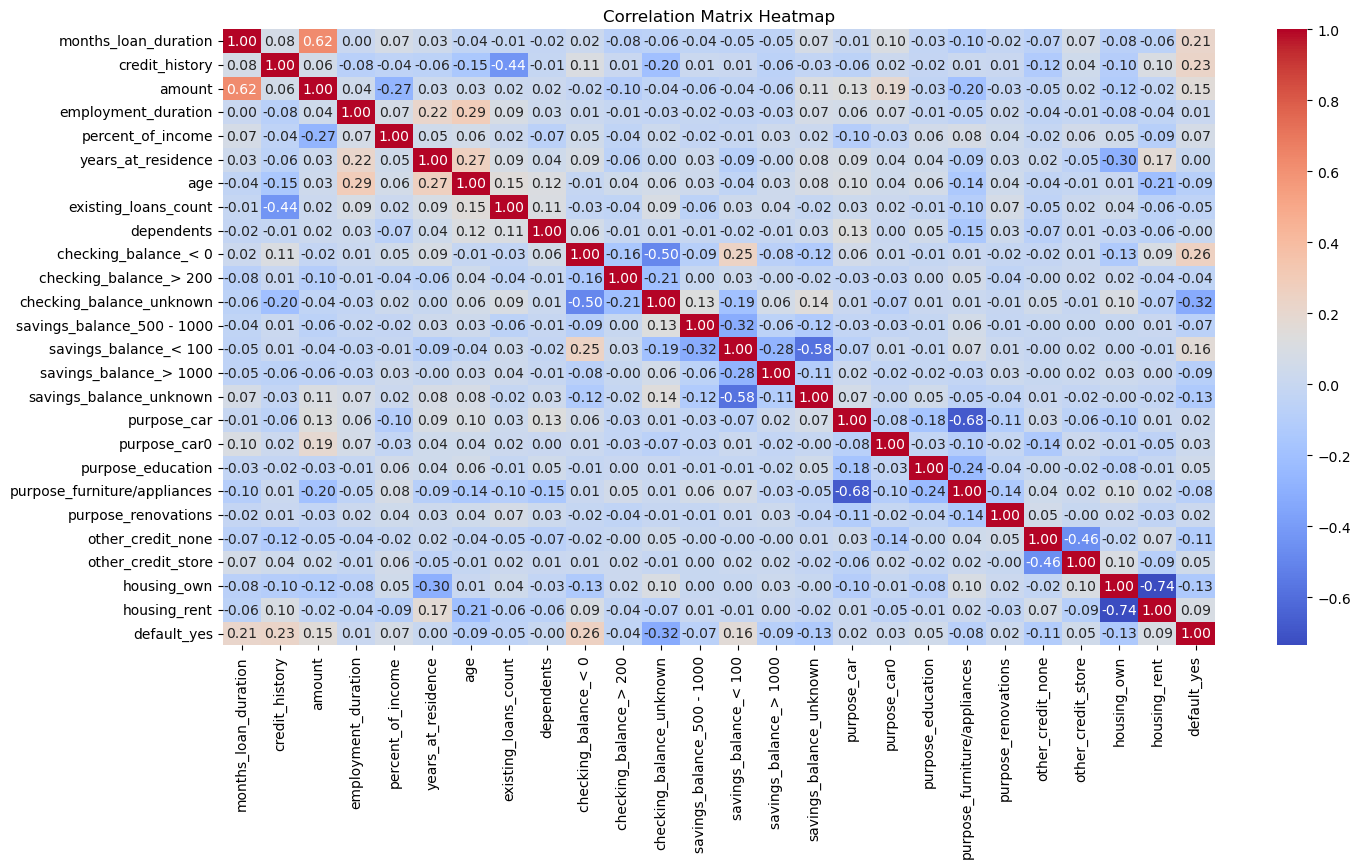

In [113]:
corr_matrix = Df_enco.corr()


plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [56]:
Df_enco.keys()

Index(['months_loan_duration', 'credit_history', 'amount',
       'employment_duration', 'percent_of_income', 'years_at_residence', 'age',
       'existing_loans_count', 'dependents', 'checking_balance_< 0',
       'checking_balance_> 200', 'checking_balance_unknown',
       'savings_balance_500 - 1000', 'savings_balance_< 100',
       'savings_balance_> 1000', 'savings_balance_unknown', 'purpose_car',
       'purpose_car0', 'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_none', 'other_credit_store',
       'housing_own', 'housing_rent', 'default_yes'],
      dtype='object')

### here we can see the corelation behaviour  is not much change of the data 

# Data scalling

In [67]:
x=Df_enco.drop(labels='default_yes',axis=1)
y=Df_enco['default_yes']

In [68]:
print('shape of x',{x.shape})
print('shape of x',{y.shape})

shape of x {(1000, 25)}
shape of x {(1000,)}


In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [70]:
x_scaled=scaler.fit_transform(x)

In [71]:
x_scaled

array([[-1.23647786, -1.34401408, -0.74513141, ..., -0.22207644,
         0.63444822, -0.4669334 ],
       [ 2.24819436,  0.50342796,  0.94981679, ..., -0.22207644,
         0.63444822, -0.4669334 ],
       [-0.73866754, -1.34401408, -0.41656241, ..., -0.22207644,
         0.63444822, -0.4669334 ],
       ...,
       [-0.73866754,  0.50342796, -0.87450324, ..., -0.22207644,
         0.63444822, -0.4669334 ],
       [ 1.9992892 ,  0.50342796, -0.50552769, ..., -0.22207644,
        -1.57617276, -0.4669334 ],
       [ 1.9992892 , -1.34401408,  0.46245715, ..., -0.22207644,
         0.63444822, -0.4669334 ]])

# Data splitting

In [72]:


from sklearn.model_selection import train_test_split


split_ratios = [0.3, 0.25, 0.2]

for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=44)

print(x_train.shape)
print(x_test.shape)


(800, 25)
(200, 25)


# MODEL TRAINING AND DEPLOYEMENT 

In [73]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



## Logistic regg

In [74]:
split_ratios = [0.3, 0.25, 0.2]
for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=44)
    
    model = LogisticRegression(random_state=44,max_iter=1000)  
    
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred_lr= model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred_lr)
    print(f"Test Size: {ratio}, Accuracy: {accuracy}")


Test Size: 0.3, Accuracy: 0.7666666666666667
Test Size: 0.25, Accuracy: 0.764
Test Size: 0.2, Accuracy: 0.765


## Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier



In [76]:
rf_classifier = RandomForestClassifier(random_state=44)
split_ratios = [0.3, 0.25, 0.2]

for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=44)
    
    rf_classifier.fit(x_train, y_train)
    y_pred_rd = rf_classifier.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred_rd)
    print(f"Test Size: {ratio}, Accuracy: {accuracy}")


Test Size: 0.3, Accuracy: 0.7666666666666667
Test Size: 0.25, Accuracy: 0.768
Test Size: 0.2, Accuracy: 0.75


## Decision tree


In [77]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=44)
split_ratios = [0.3, 0.25, 0.2]

for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=44)
    dt_classifier.fit(x_train, y_train)
    
    y_pred_dt = dt_classifier.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred_dt)
    print(f"Test Size: {ratio}, Accuracy: {accuracy}")


Test Size: 0.3, Accuracy: 0.6966666666666667
Test Size: 0.25, Accuracy: 0.68
Test Size: 0.2, Accuracy: 0.69


#  Evaluation Matrices 

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd



split_ratios = [0.3, 0.25, 0.2]

models = {
    'Logistic Regression': LogisticRegression(random_state=44, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=44),
    'Decision Tree': DecisionTreeClassifier(random_state=44)
}

results = []

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1 Score': f1_score(y_test, y_pred, average='binary'),
        'ROC AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A',
        'Confusion Matrix': confusion_matrix(y_test, y_pred).tolist()  # Convert to list for better readability
    }

for ratio in split_ratios:
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=ratio, random_state=44)
    
    for model_name, model in models.items():
        model.fit(X_train, Y_train)
        metrics = evaluate_model(model, X_test, Y_test)
        results.append({
            'Model': model_name,
            'Split': f'{int((1-ratio)*100)}/{int(ratio*100)}',
            **metrics
        })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Split  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  70/30  0.766667   0.649123  0.425287  0.513889   
1        Random Forest  70/30  0.766667   0.660377  0.402299  0.500000   
2        Decision Tree  70/30  0.696667   0.477273  0.482759  0.480000   
3  Logistic Regression  75/25  0.764000   0.634615  0.452055  0.528000   
4        Random Forest  75/25  0.768000   0.666667  0.410959  0.508475   
5        Decision Tree  75/25  0.680000   0.459770  0.547945  0.500000   
6  Logistic Regression  80/20  0.765000   0.627907  0.465517  0.534653   
7        Random Forest  80/20  0.750000   0.617647  0.362069  0.456522   
8        Decision Tree  80/20  0.690000   0.467742  0.500000  0.483333   

    ROC AUC       Confusion Matrix  
0  0.813879  [[193, 20], [50, 37]]  
1  0.793454  [[195, 18], [52, 35]]  
2  0.633398  [[167, 46], [45, 42]]  
3  0.810618  [[158, 19], [40, 33]]  
4  0.793282  [[162, 15], [43, 30]]  
5  0.641204  [[130, 47], [33, 40]]  


## Based on the evaluation metrics, Logistic Regression seems to be the best fit for model:

It maintains a high ROC AUC (~0.81) across all splits, indicating strong capability in distinguishing between classes.
It offers a good balance between precision, recall, and F1 score, making it reliable for both identifying true positives and minimizing false positives.

# Preparing production dataset  

In [79]:
df_pred=pd.read_csv('D:\DATA\intern\Predict_Data_Singapore Credit Dataset.csv')
df_pred.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no
1,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes
2,1 - 200 SGD,30,critical,car,5234,< 100 SGD,unemployed,4,2,28,none,own,2,management,1,no
3,< 0 SGD,24,critical,car,1199,< 100 SGD,> 7 years,4,4,60,none,own,2,unskilled,1,no
4,< 0 SGD,30,perfect,business,8072,unknown,< 1 year,2,3,25,bank,own,3,skilled,1,no


In [80]:
df_pred.shape

(250, 16)

In [81]:
df_pred.keys()

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone'],
      dtype='object')

In [82]:
oh_enc=OneHotEncoder(sparse_output=False,drop='first')
oh_enc_fit=oh_enc.fit_transform(df_pred[['checking_balance', 'savings_balance', 'purpose', 'other_credit','housing']])
oh_enc_fit.shape


(250, 16)

In [83]:
columns_to_encode=['checking_balance', 'savings_balance', 'purpose', 'other_credit','housing']

oh_enc_df=pd.DataFrame(oh_enc_fit,columns=[ 'checking_balance_< 0',
       'checking_balance_> 200', 'checking_balance_unknown'
       ,'savings_balance_500 - 1000',
       'savings_balance_< 100', 'savings_balance_> 1000',
       'savings_balance_unknown', 'purpose_car',
       'purpose_car0', 'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_none',
       'other_credit_store', 'housing_own', 'housing_rent'])
Df_pre = pd.concat([df_pred.drop(columns=columns_to_encode), oh_enc_df], axis=1)
Df_pre.head()

,months_loan_duration,credit_history,amount,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,job,dependents,phone,checking_balance_< 0,checking_balance_> 200,checking_balance_unknown,savings_balance_500 - 1000,savings_balance_< 100,savings_balance_> 1000,savings_balance_unknown,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent
0,48,good,5951,1 - 4 years,2,2,22,1,skilled,1,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,36,good,9055,1 - 4 years,2,4,35,1,unskilled,2,yes,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,30,critical,5234,unemployed,4,2,28,2,management,1,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,24,critical,1199,> 7 years,4,4,60,2,unskilled,1,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,30,perfect,8072,< 1 year,2,3,25,3,skilled,1,no,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
from sklearn.preprocessing import OrdinalEncoder
order_label={"perfect":5,"very good":4,"good":3,"poor":2,"critical":1}
Df_pre["credit_history"]=Df_pre["credit_history"].map(order_label)
Df_pre.head(10)


,months_loan_duration,credit_history,amount,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,job,dependents,phone,checking_balance_< 0,checking_balance_> 200,checking_balance_unknown,savings_balance_500 - 1000,savings_balance_< 100,savings_balance_> 1000,savings_balance_unknown,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent
0,48,3,5951,1 - 4 years,2,2,22,1,skilled,1,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,36,3,9055,1 - 4 years,2,4,35,1,unskilled,2,yes,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,30,1,5234,unemployed,4,2,28,2,management,1,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,24,1,1199,> 7 years,4,4,60,2,unskilled,1,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,30,5,8072,< 1 year,2,3,25,3,skilled,1,no,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6,3,2647,1 - 4 years,2,3,44,1,skilled,2,no,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,6,3,1374,1 - 4 years,1,2,36,1,unskilled,1,yes,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,60,2,6836,> 7 years,3,4,63,2,skilled,1,yes,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,12,1,1264,> 7 years,4,4,57,1,unskilled,1,no,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,18,3,2100,1 - 4 years,4,2,37,1,skilled,1,no,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [85]:
Df_prd=Df_pre.copy()

In [87]:
from sklearn.preprocessing import OrdinalEncoder


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Df_prd['employment_duration'] = encoder.fit_transform(Df_prd['employment_duration'])
Df_prd.head(5)

,months_loan_duration,credit_history,amount,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,job,dependents,phone,checking_balance_< 0,checking_balance_> 200,checking_balance_unknown,savings_balance_500 - 1000,savings_balance_< 100,savings_balance_> 1000,savings_balance_unknown,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent
0,48,3,5951,0,2,2,22,1,skilled,1,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,36,3,9055,0,2,4,35,1,unskilled,2,yes,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,30,1,5234,4,4,2,28,2,management,1,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,24,1,1199,3,4,4,60,2,unskilled,1,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,30,5,8072,2,2,3,25,3,skilled,1,no,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [88]:
x_test_pred=Df_prd.drop(["job","phone"],axis=1)

In [89]:
x_test_pred.head()

,months_loan_duration,credit_history,amount,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0,checking_balance_> 200,checking_balance_unknown,savings_balance_500 - 1000,savings_balance_< 100,savings_balance_> 1000,savings_balance_unknown,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent
0,48,3,5951,0,2,2,22,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,36,3,9055,0,2,4,35,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,30,1,5234,4,4,2,28,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,24,1,1199,3,4,4,60,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,30,5,8072,2,2,3,25,3,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
x_test_pred.shape

(250, 25)

# now evaluation of target variable for  production dataset

In [91]:
# logistic regg
split_ratios = [0.3, 0.25, 0.2]
for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=44)
    
    Lr = LogisticRegression(random_state=44,max_iter=1000)  
    
    Lr.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = Lr.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Size: {ratio}, Accuracy: {accuracy}")


Test Size: 0.3, Accuracy: 0.7666666666666667
Test Size: 0.25, Accuracy: 0.764
Test Size: 0.2, Accuracy: 0.765


In [92]:
pred=Lr.predict(x_test_pred)
pred

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [96]:
import numpy as np

pred = np.array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])


# Append the 'pred' array to the dataset and name it
df_pred['default'] = pred

# You can access the array by its name



In [97]:
df_pred.tail(7)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
243,< 0 SGD,60,good,business,7297,< 100 SGD,> 7 years,4,4,36,none,rent,1,skilled,1,no,1.0
244,1 - 200 SGD,18,poor,business,2427,unknown,> 7 years,4,2,42,none,own,2,skilled,1,no,0.0
245,unknown,48,good,business,4844,< 100 SGD,unemployed,3,2,33,bank,rent,1,management,1,yes,1.0
246,< 0 SGD,15,critical,furniture/appliances,1433,< 100 SGD,1 - 4 years,4,3,25,none,rent,2,skilled,1,no,0.0
247,1 - 200 SGD,24,critical,furniture/appliances,1743,< 100 SGD,> 7 years,4,2,48,none,own,2,unskilled,1,no,0.0
248,< 0 SGD,36,good,furniture/appliances,3959,< 100 SGD,unemployed,4,3,30,none,own,1,management,1,yes,1.0
249,unknown,12,good,furniture/appliances,804,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,0.0


In [100]:
Predicted_Data_Singapore_Credit_Data=df_pred.drop(["job","phone"],axis=1)
Predicted_Data_Singapore_Credit_Data.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,dependents,default
0,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,1,1.0
1,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,2,0.0
2,1 - 200 SGD,30,critical,car,5234,< 100 SGD,unemployed,4,2,28,none,own,2,1,0.0
3,< 0 SGD,24,critical,car,1199,< 100 SGD,> 7 years,4,4,60,none,own,2,1,0.0
4,< 0 SGD,30,perfect,business,8072,unknown,< 1 year,2,3,25,bank,own,3,1,1.0


In [99]:
Predicted_Data_Singapore_Credit_Data.shape

(250, 15)

# Importing Data 

In [ ]:


file_path = 'D:\DATA\intern\Predicted_Data_Singapore_Credit_Dataaa.csv'
Predicted_Data_Singapore_Credit_Data.to_csv(file_path, index=False)


In [ ]:

file_path = 'D:\DATA\df_pred.csv'

df.to_csv(file_path, index=False)

# Now the data has been processed to Power BI and presentation is ready .

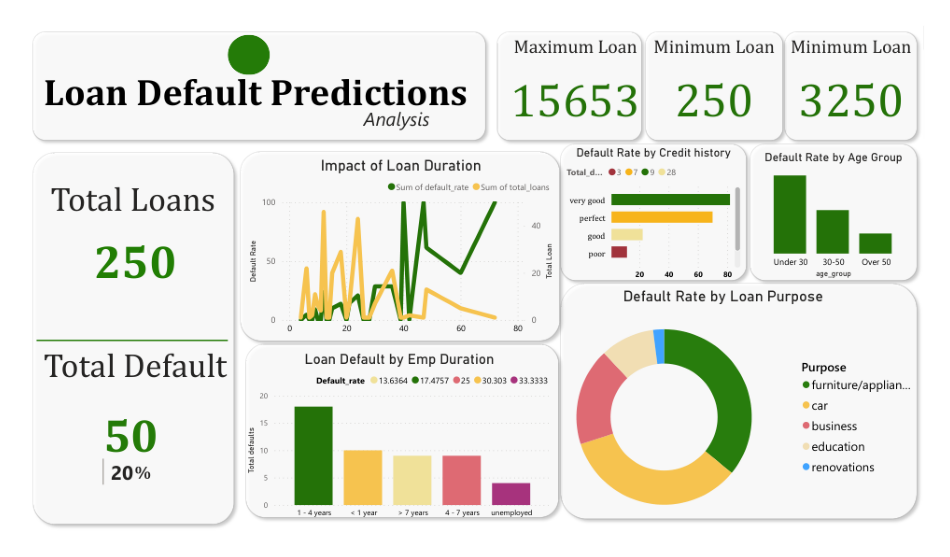

In [114]:
!pip install PyMuPDF

import fitz 
from PIL import Image
import io
import matplotlib.pyplot as plt

pdf_path = 'D:\Downloads\LOAN Default.pdf'
pdf_document = fitz.open(pdf_path)

page_number = 0
page = pdf_document.load_page(page_number)

pix = page.get_pixmap()

image_data = pix.pil_tobytes(format='png')
image = Image.open(io.BytesIO(image_data))

plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')  
plt.show()
